In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss
import pingouin as pg
import scipy as sc

from urllib.parse import urlencode
import requests

---

### Задача 1

Перейдем к задаче. Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) вы получили F = 3.5, тогда:

https://gallery.shinyapps.io/dist_calc/
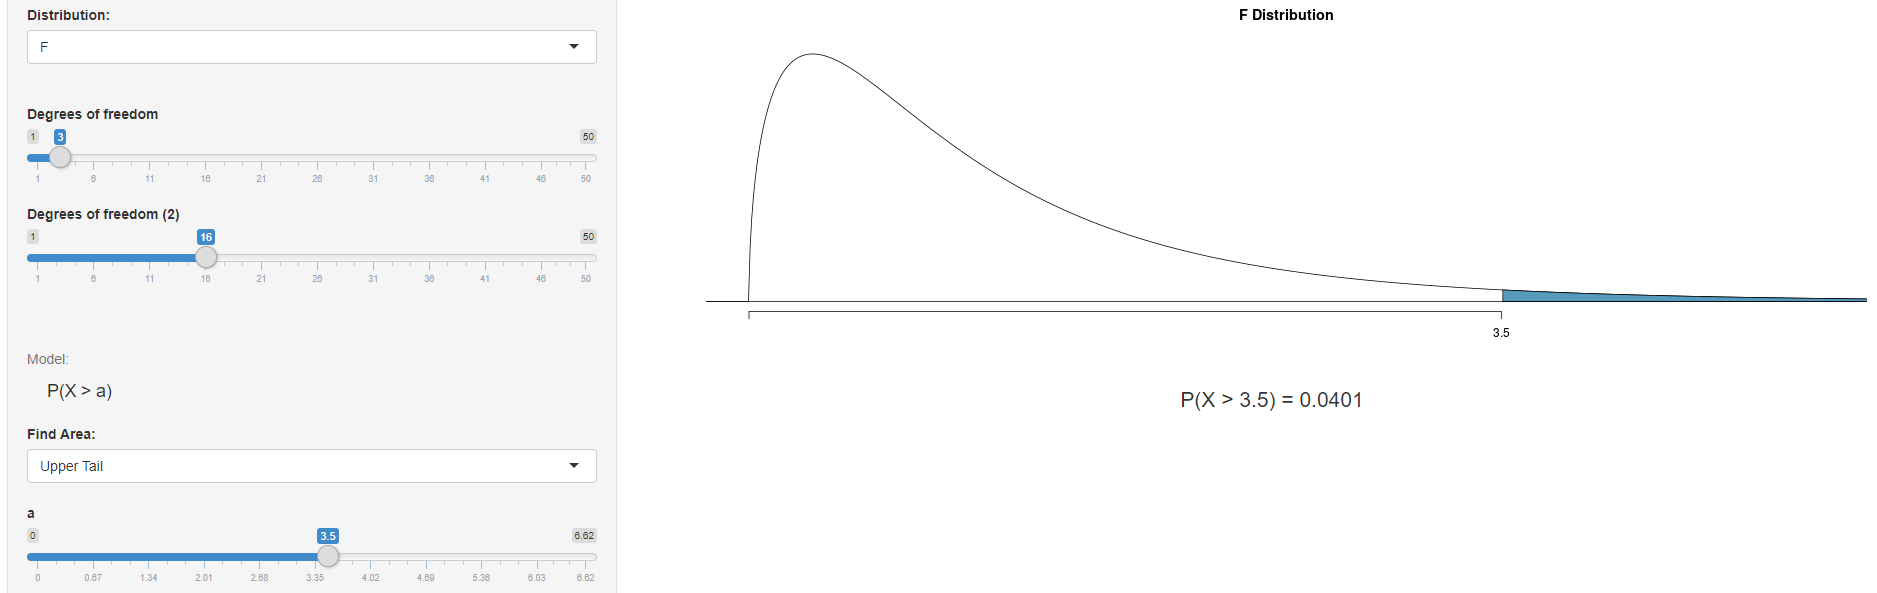

### Задача 4

Чтобы выяснить, как лучше преподавать статистику, преподаватели разбили студентов на пять групп. ...

Сколько сравнений необходимо произвести, чтобы попарно сравнить все группы между собой?

In [3]:
sc.special.comb(5, 2)

10.0

---

### Задача 6

Группа исследователей усомнилась в безвредности пассивного курения и исследовали проходимость дыхательных путей у некурящих, пассивных и активных курильщиков. В качестве зависимой переменной выступал один из показателей функции внешнего дыхания — максимальная объемная скорость середины выдоха. Исследователям удалось отклонить основную нулевую гипотезу о равенстве средних при p<0.05.

Для попарного сравнения всех групп между собой использовалась поправка Бонферрони. Различия между группами признавались статистически достоверными, если p-уровень значимости:

In [4]:
0.05 / sc.special.comb(3, 2)

0.016666666666666666

---

# Проект
На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

* В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
* Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый.

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.


Описание данных:

5_task_1:

- id – id клиента в эксперименте
- group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
- events – сколько блюд суммарно было заказано за период

5_task_2:

- id – id клиента в эксперименте
- segment – сегмент (high/low)
- group – вид кнопки (control – старая версия, test – новая версия)
- events – сколько блюд суммарно было заказано за период

In [14]:
from urllib.parse import urlencode
import requests

# Загружаем таблицы в DataFrame, используя api Яндекс.Диска.
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/Lj5WClBbCt3fyw' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
df_test1 = pd.read_csv(requests.get(final_url).json()['href'])
df_test1[:3]

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30


In [16]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


In [15]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/Vnlvg9uOrMVKhw' 

final_url = base_url + urlencode(dict(public_key=public_key)) 
df_test2 = pd.read_csv(requests.get(final_url).json()['href'])
df_test2[:3]

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0


In [17]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


---

## Задание 3

Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

Hint: scipy.stats.levene либо pingouin.homoscedasticity

In [20]:
# Returns
# statspandas.DataFrame
# 'W/T': Test statistic (‘W’ for Levene, ‘T’ for Bartlett)
# 'pval': p-value
# 'equal_var': True if data has equal variance

pg.homoscedasticity(df_test1, dv='events', group='group', method='levene', alpha=0.05)

,W,pval,equal_var
levene,2.26226,0.104133,True


---

## Задание 4

Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

Выберите верные утверждения:

In [31]:
ss.normaltest(df_test1.query("group == 'A'").events)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

In [29]:
ss.normaltest(df_test1.query("group == 'B'").events)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [30]:
ss.normaltest(df_test1.query("group == 'C'").events)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

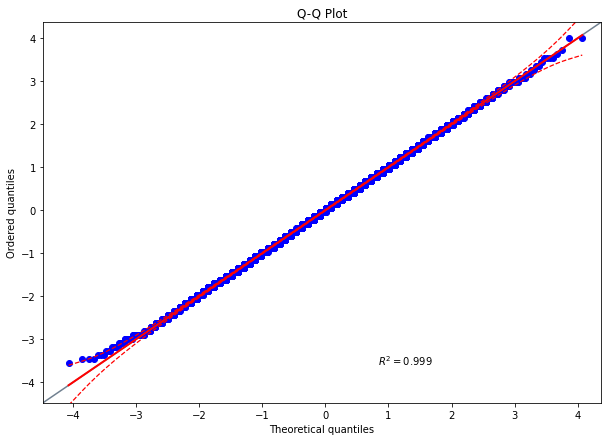

In [55]:
pg.qqplot(df_test1.events, dist='norm', confidence=0.95, figsize=(10,7))

---

## Задание 5

Самое время провести тест! 

Для сравнения средних я использую 
ВЫБРАТЬ
. Значение статистики равно (окр. до целого) 
ВЫБРАТЬ
, а р-уровень значимости составил 
ВЫБРАТЬ
.



In [34]:
pg.anova(data=df_test1, dv='events',  between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


---

## Задание 6

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки?

In [35]:
pg.pairwise_tukey(data=df_test1, dv='events',  between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


---

## Задание 9
Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп. Соотнесите графики распределения и экспериментальные группы:

In [133]:
df_test2[:1]

,id,group,segment,events
0,83440,test,high,78.0


In [112]:
df_test2.group.unique()

array(['test', 'control'], dtype=object)

In [119]:
sns.set(
    font_scale =1.5,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20, 7)}
)

<AxesSubplot:xlabel='events', ylabel='Count'>

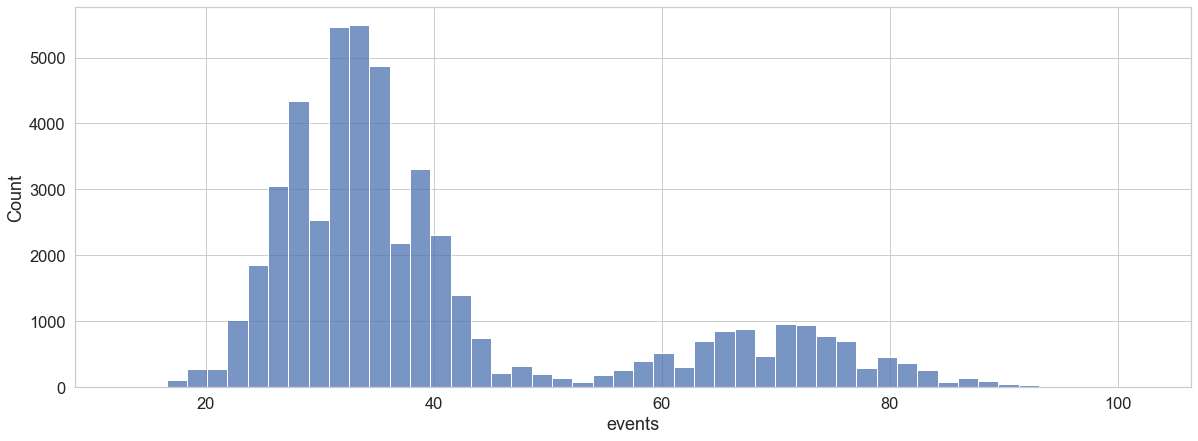

In [131]:
sns.histplot(df_test2[df_test2.group == 'test'].events, kde = False, bins=50)

<AxesSubplot:xlabel='events', ylabel='Count'>

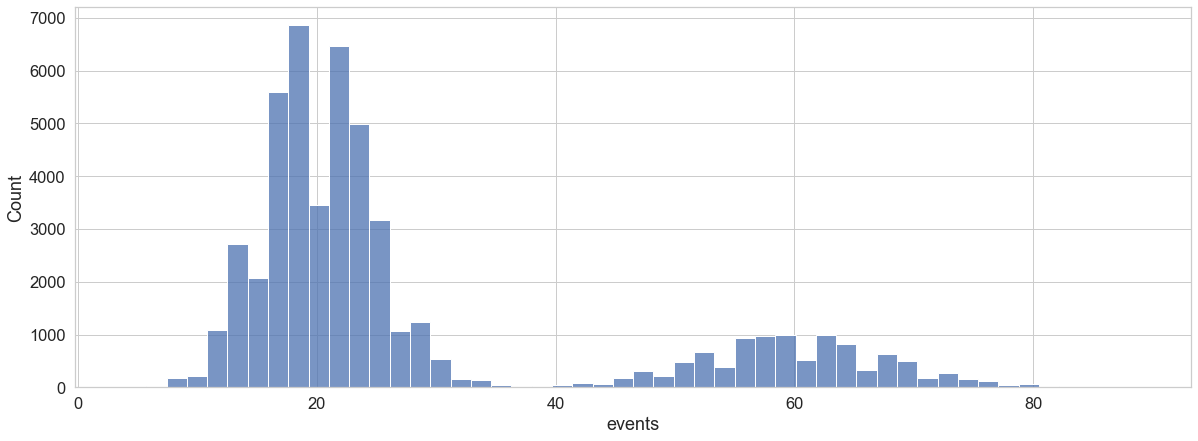

In [132]:
sns.histplot(df_test2[df_test2.group == 'control'].events, kde = False, bins=50)

---

## Задание 9

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [139]:
round(df_test2.groupby(['group', 'segment'], as_index = False).agg({'events': ['mean', 'median', 'std']}), 2)

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

---

## Задание 12

Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:


Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения.

Note:  При интерпретации обратите внимание на то, какая из групп с какой сравнивается и как считается meandiff.

In [141]:
pg.anova(data=df_test2, dv='events',  between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [148]:
df_test2['comb_group'] = df_test2.group + ' - ' + df_test2.segment

In [150]:
df_test2[:1]

,id,group,segment,events,comb_group
0,83440,test,high,78.0,test - high


In [152]:
pg.pairwise_tukey(data=df_test2, dv='events',  between='comb_group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control - high,control - low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,6.824282
1,control - high,test - high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.703109
2,control - high,test - low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.603981
3,control - low,test - high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-8.527429
4,control - low,test - low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.220314
5,test - high,test - low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,6.307128


### Задание 13

Визуализируйте результаты теста и заполните пропуски:
Фактор group оказался 
ВЫБРАТЬ
, фактор segment – 
ВЫБРАТЬ
, их взаимодействие – 
ВЫБРАТЬ
. Судя по графику, для всех групп среднее значение events 
ВЫБРАТЬ
, поэтому решение: 
ВЫБРАТЬ
.

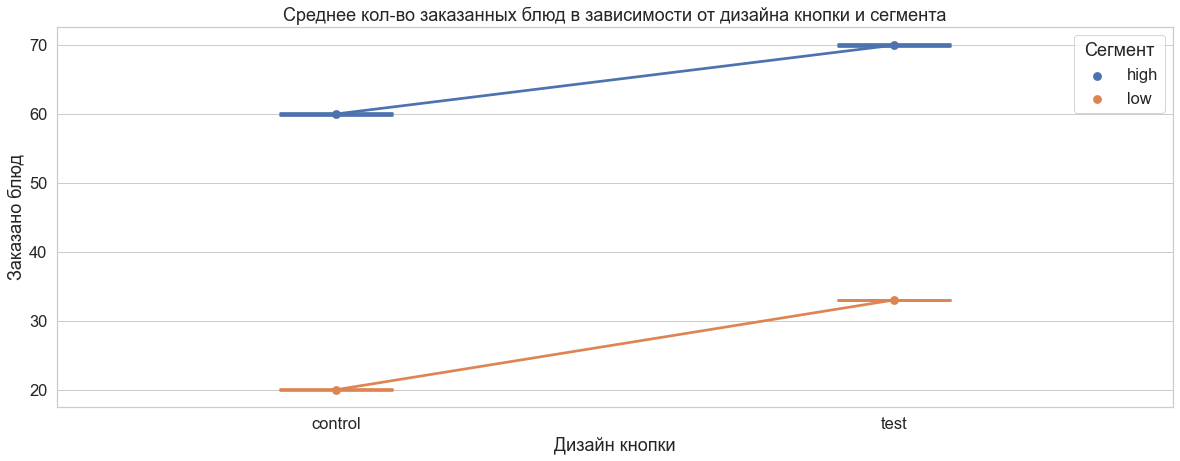

In [159]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df_test2, capsize = .2, order=['control', 'test'])
plt.title('Среднее кол-во заказанных блюд в зависимости от дизайна кнопки и сегмента')
plt.xlabel('Дизайн кнопки')
plt.ylabel('Заказано блюд')
plt.legend(title = 'Сегмент')